# Определение перспективного тарифа для телеком компании.

## Описание тарифов:  

### Тариф «Смарт»:
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»:
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

 «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Описание данных

### Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

### Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

### Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

### Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

## План работ:  

- 1  Ознакомление с данными.  
- 2  Подготовка данных.  
- 3  Анализ данных.  
- 4  Проверка гипотиз.  
- 5  Общий вывод.  

## 1 Ознакомление с данными.

Откроем файл с данными и изучим общую информацию:

In [1]:
import pandas as pd

In [2]:
calls = pd.read_csv('datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
internet = pd.read_csv('datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
messages = pd.read_csv('datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
tariffs = pd.read_csv('datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
users = pd.read_csv('datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблицах присутсвуют неудобные типы данных. Даты нужно переделать в тип данных datetime, мегобайты и секнду звонков нужно округлить в бОльшую сторону и переделать в int. Пропуски отсутсвуют(пропуски users['churn_date'] по условиям - абоненты, не отказавшиеся от услуг оператора).

## 2 Подготовка данных.

Переведём формат данных в столбцах с датами в datetime и добавим столбцы с месяцем для дальнейшего анализа:

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [14]:
users['month_reg'] = pd.DatetimeIndex(users['reg_date']).month

Заполним пропуски churn_date выбивающимся значением:

In [15]:
users['churn_date'] = users['churn_date'].fillna(0-0-0)

In [16]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [17]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg
0,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,1970-01-01,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,1970-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,1970-01-01,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,1970-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
 8   month_reg   500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB


Проверим столбец reg_date на подозрительныен данные:

In [19]:
users['reg_date'].describe()

count                     500
unique                    270
top       2018-05-28 00:00:00
freq                        8
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object

Подозрительных данных не замечено. Даты соответсвуют году в задаче.  

Попробуем проверить, сколько дат отказа превышает дату регистрации

In [20]:
alarm = 0
for i in users.index:
    if users.loc[i, 'churn_date'] >= users.loc[i, 'reg_date']:
        pass
    else:
        alarm += 1
print(alarm)

462


Всё в порядке, 462 - наши заполненные пропуски, оставшиеся 38 значений актуальны.  

Проверим возраст клиентов:

In [21]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Все люди старше 18. Возраст кажется адекватным.

Переведём данные таблицы calls:

In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [23]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [24]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [25]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Округлим продолжительности звнков в большую сторону по условиям задачи:

In [26]:
import math

In [27]:
def rounded_calls(calls):
    for row in calls:
        return math.ceil(calls['duration'])

In [28]:
calls['duration'] = calls.apply(rounded_calls, axis=1)

In [29]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Проверим данные в столбце duration:

In [30]:
calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [31]:
calls.query('duration == 0').count()

id           39613
call_date    39613
duration     39613
user_id      39613
month        39613
dtype: int64

Цифры вполне реальны. Значение 0 - скорее всего пропущенные звонки.  
Строки с такими значениями не повлияют на расчеты в дальнейшем.

Сгрупперуем данные по столбцам user_id и month, по столбцу id посчитаем колличество звонков в месяце, а по duration посчитаем сумму минут в месяце:

In [32]:
calls_grouped = calls.groupby(['user_id', 'month']).agg({'duration':'sum'})

In [33]:
calls_grouped.head(10)

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466
        10          350
        11          338
        12          333
1001    11          430
        12          414

In [34]:
calls_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   duration  3174 non-null   int64
dtypes: int64(1)
memory usage: 38.1 KB


Тоже самое проделаем с таблицей internet:

In [35]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [36]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [37]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


Округлим трафик в большую сторону по условиям задачи::

In [38]:
def rounded_internet(internet):
    for row in internet:
        return math.ceil(internet['mb_used'])

In [39]:
internet['mb_used'] = internet.apply(rounded_internet, axis=1)

In [40]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9


Проверим израсходованный интернет:

In [41]:
internet['mb_used'].describe()

count    149396.000000
mean        370.622098
std         278.387019
min           0.000000
25%         139.000000
50%         349.000000
75%         560.000000
max        1725.000000
Name: mb_used, dtype: float64

Чегото сверх нормы не заметно. Cтроки со значением 0 просто не повлияют на расчёты:

Сгрупперуем данные по столбцам user_id и month, по столбцу id посчитаем колличество сессий в месяце, а по mb_used посчитаем сумму мкгабайт в месяце:

In [42]:
internet_grouped = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'})

In [43]:
internet_grouped.head(10)

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
        10       14717
        11       14768
        12        9827
1001    11       18452
        12       14053

In [44]:
internet_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   mb_used  3203 non-null   int64
dtypes: int64(1)
memory usage: 38.5 KB


Тоже самое проделаем со столбцом messages:

In [45]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [46]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [47]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Сгрупперуем данные по столбцам user_id и month, по столбцу id посчитаем колличество сообщений в месяце:

In [48]:
messages_grouped = messages.groupby(['user_id', 'month']).agg({'id':'count'})

In [49]:
messages_grouped.head(10)

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
        10     73
        11     58
        12     70
1002    6       4
        7      11

In [50]:
messages_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      2717 non-null   int64
dtypes: int64(1)
memory usage: 32.7 KB


Соберём все таблицы в одну:

In [51]:
all_table_grouped = messages_grouped.merge(internet_grouped, on=['user_id', 'month'], suffixes=('_messages', '_internet'), how='outer')

In [52]:
all_table_grouped

id  mb_used
user_id month               
1000    5      22.0   2256.0
        6      60.0  23257.0
        7      75.0  14016.0
        8      81.0  14070.0
        9      57.0  14581.0
...             ...      ...
1494    8       NaN   6601.0
        9       NaN  16986.0
        10      NaN  17794.0
        11      NaN  18076.0
        12      NaN  17645.0

[3214 rows x 2 columns]

In [53]:
all_table_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1494, 12)
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2717 non-null   float64
 1   mb_used  3203 non-null   float64
dtypes: float64(2)
memory usage: 63.7 KB


In [54]:
all_table_grouped = all_table_grouped.merge(calls_grouped, on=['user_id', 'month'], how='outer')

Переименуем столбцы для лёгкого восприятия:

In [55]:
all_table_grouped.rename(columns={'id': 'count_messages', 'duration': 'duration_calls'},  inplace=True)

In [56]:
all_table_grouped.head(30)

count_messages  mb_used  duration_calls
user_id month                                         
1000    5                22.0   2256.0           159.0
        6                60.0  23257.0           172.0
        7                75.0  14016.0           340.0
        8                81.0  14070.0           408.0
        9                57.0  14581.0           466.0
        10               73.0  14717.0           350.0
        11               58.0  14768.0           338.0
        12               70.0   9827.0           333.0
1002    6                 4.0  10871.0           117.0
        7                11.0  17601.0           214.0
        8                13.0  20347.0           289.0
        9                 4.0  16712.0           206.0
        10               10.0  13905.0           212.0
        11               16.0  18610.0           243.0
        12               12.0  18137.0           236.0
1003    8                37.0   8571.0           380.0
        9                91.0  12479.0           961.0
        10               83.0  14779.0           855.0
        11               94.0  11368.0           824.0
        12               75.0  10132.0           802.0
1004    5                95.0  13415.0            35.0
        6               134.0  17619.0           171.0
        7               181.0  22243.0           135.0
        8               151.0  28607.0           137.0
        9               146.0  15125.0           117.0
        10              165.0  18494.0           145.0
        11              158.0  15631.0           117.0
        12              162.0  18038.0           130.0
1005    1                 7.0   2730.0            95.0
        2                38.0   7394.0           456.0

Сбросим индексы сгруппированных таблиц для дальнейшего объединения:

In [57]:
all_table_grouped = all_table_grouped.reset_index()
all_table_grouped.head(30)

,user_id,month,count_messages,mb_used,duration_calls
0,1000,5,22.0,2256.0,159.0
1,1000,6,60.0,23257.0,172.0
2,1000,7,75.0,14016.0,340.0
3,1000,8,81.0,14070.0,408.0
4,1000,9,57.0,14581.0,466.0
5,1000,10,73.0,14717.0,350.0
6,1000,11,58.0,14768.0,338.0
7,1000,12,70.0,9827.0,333.0
8,1002,6,4.0,10871.0,117.0
9,1002,7,11.0,17601.0,214.0


Продолжим объединение таблиц:

In [58]:
all_table_grouped = users.merge(all_table_grouped, on=['user_id'], how='outer')

In [59]:
all_table_grouped

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg,month,count_messages,mb_used,duration_calls
0,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,5.0,22.0,2256.0,159.0
1,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,6.0,60.0,23257.0,172.0
2,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,7.0,75.0,14016.0,340.0
3,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,8.0,81.0,14070.0,408.0
4,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,9.0,57.0,14581.0,466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10.0,42.0,20604.0,247.0
3212,1499,35,1970-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9.0,11.0,1848.0,70.0
3213,1499,35,1970-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9,10.0,48.0,17809.0,449.0
3214,1499,35,1970-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9,11.0,59.0,17984.0,612.0


In [60]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Переименуем столбец tariffs['tariff_name'] для возможности дальнеёшего слияния:

In [61]:
tariffs.rename(columns={'tariff_name': 'tariff'},  inplace=True)

In [62]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [63]:
all_table_grouped = all_table_grouped.merge(tariffs, on='tariff', how='outer')

In [64]:
all_table_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   age                    3216 non-null   int64         
 2   churn_date             3216 non-null   datetime64[ns]
 3   city                   3216 non-null   object        
 4   first_name             3216 non-null   object        
 5   last_name              3216 non-null   object        
 6   reg_date               3216 non-null   datetime64[ns]
 7   tariff                 3216 non-null   object        
 8   month_reg              3216 non-null   int64         
 9   month                  3214 non-null   float64       
 10  count_messages         2717 non-null   float64       
 11  mb_used                3203 non-null   float64       
 12  duration_calls         3174 non-null   float64       
 13  mes

Заполним пропуски для возможности перевода типа данных в int нулями.  

In [65]:
all_table_grouped['count_messages'].fillna(0, inplace=True)

In [66]:
all_table_grouped['mb_used'].fillna(0, inplace=True)

In [67]:
all_table_grouped['duration_calls'].fillna(0, inplace=True)

In [68]:
all_table_grouped['month'].fillna(0, inplace=True)

In [69]:
all_table_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   age                    3216 non-null   int64         
 2   churn_date             3216 non-null   datetime64[ns]
 3   city                   3216 non-null   object        
 4   first_name             3216 non-null   object        
 5   last_name              3216 non-null   object        
 6   reg_date               3216 non-null   datetime64[ns]
 7   tariff                 3216 non-null   object        
 8   month_reg              3216 non-null   int64         
 9   month                  3216 non-null   float64       
 10  count_messages         3216 non-null   float64       
 11  mb_used                3216 non-null   float64       
 12  duration_calls         3216 non-null   float64       
 13  mes

Переведём все типы данных float в тип int:

In [70]:
all_table_grouped[['month', 'count_messages', 'mb_used', 'duration_calls']] = all_table_grouped[['month', 'count_messages', 'mb_used', 'duration_calls']].astype('int')

In [71]:
all_table_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   age                    3216 non-null   int64         
 2   churn_date             3216 non-null   datetime64[ns]
 3   city                   3216 non-null   object        
 4   first_name             3216 non-null   object        
 5   last_name              3216 non-null   object        
 6   reg_date               3216 non-null   datetime64[ns]
 7   tariff                 3216 non-null   object        
 8   month_reg              3216 non-null   int64         
 9   month                  3216 non-null   int32         
 10  count_messages         3216 non-null   int32         
 11  mb_used                3216 non-null   int32         
 12  duration_calls         3216 non-null   int32         
 13  mes

In [72]:
all_table_grouped

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg,month,count_messages,mb_used,duration_calls,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,5,22,2256,159,1000,30720,3000,1950,150,1,1
1,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,6,60,23257,172,1000,30720,3000,1950,150,1,1
2,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,7,75,14016,340,1000,30720,3000,1950,150,1,1
3,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,8,81,14070,408,1000,30720,3000,1950,150,1,1
4,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,9,57,14581,466,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10,42,20604,247,50,15360,500,550,200,3,3
3212,1499,35,1970-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9,11,1848,70,50,15360,500,550,200,3,3
3213,1499,35,1970-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9,10,48,17809,449,50,15360,500,550,200,3,3
3214,1499,35,1970-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9,11,59,17984,612,50,15360,500,550,200,3,3


Добавим в таблицу помесячную выручку.  
Для начала посчитаем прибыль сверх тарифа по пстолбцу смс:

In [73]:
all_table_grouped['revenue_messages_more_lims'] = (all_table_grouped['count_messages'] - all_table_grouped['messages_included']) * all_table_grouped['rub_per_message']
all_table_grouped['revenue_messages_more_lims']

0      -978
1      -940
2      -925
3      -919
4      -943
       ... 
3211    -24
3212   -117
3213     -6
3214     27
3215     48
Name: revenue_messages_more_lims, Length: 3216, dtype: int64

Избавимся от отрицательных данных, т.к. они не влияют на выручку:

In [74]:
for i in all_table_grouped.index:
    if all_table_grouped.loc[i, 'revenue_messages_more_lims'] <= 0:
        all_table_grouped.loc[i, 'revenue_messages_more_lims'] = 0
all_table_grouped['revenue_messages_more_lims']

0        0
1        0
2        0
3        0
4        0
        ..
3211     0
3212     0
3213     0
3214    27
3215    48
Name: revenue_messages_more_lims, Length: 3216, dtype: int64

Посчимтаем прибыль сверх тарифа по звонкам:

In [75]:
all_table_grouped['revenue_calls_more_lims'] = (all_table_grouped['duration_calls'] - all_table_grouped['minutes_included']) * all_table_grouped['rub_per_minute']
all_table_grouped['revenue_calls_more_lims']

0      -2841
1      -2828
2      -2660
3      -2592
4      -2534
        ... 
3211    -759
3212   -1290
3213    -153
3214     336
3215     -24
Name: revenue_calls_more_lims, Length: 3216, dtype: int64

Избавимся от отрицательных значений:

In [76]:
for i in all_table_grouped.index:
    if all_table_grouped.loc[i, 'revenue_calls_more_lims'] <= 0:
        all_table_grouped.loc[i, 'revenue_calls_more_lims'] = 0
all_table_grouped['revenue_calls_more_lims']

0         0
1         0
2         0
3         0
4         0
       ... 
3211      0
3212      0
3213      0
3214    336
3215      0
Name: revenue_calls_more_lims, Length: 3216, dtype: int64

Посчимтаем колличество израсходованных мегабайт сверх тарифа:

In [77]:
all_table_grouped['mb_more_lims'] = all_table_grouped['mb_used'] - all_table_grouped['mb_per_month_included']
all_table_grouped['mb_more_lims']

0      -28464
1       -7463
2      -16704
3      -16650
4      -16139
        ...  
3211     5244
3212   -13512
3213     2449
3214     2624
3215    -2283
Name: mb_more_lims, Length: 3216, dtype: int64

Избавимся от отрицательных значений:

In [78]:
for i in all_table_grouped.index:
    if all_table_grouped.loc[i, 'mb_more_lims'] < 0:
        all_table_grouped.loc[i, 'mb_more_lims'] = 0
all_table_grouped['mb_more_lims']

0          0
1          0
2          0
3          0
4          0
        ... 
3211    5244
3212       0
3213    2449
3214    2624
3215       0
Name: mb_more_lims, Length: 3216, dtype: int64

Переведём мегабайты в гигабайты:

In [79]:
all_table_grouped['revenue_gb_more_lims'] = all_table_grouped['mb_more_lims'] / 1024

Округлим гигабайты в бОльшую сторону:

In [80]:
def rounded_gb(all_table_grouped):
    for row in all_table_grouped:
        return math.ceil(all_table_grouped['revenue_gb_more_lims'])

In [81]:
all_table_grouped['revenue_gb_more_lims'] = all_table_grouped.apply(rounded_gb, axis=1)

Посчитаем прибыль за превышение лимита по интернету:

In [82]:
all_table_grouped['revenue_gb_more_lims'] = all_table_grouped['revenue_gb_more_lims'] * all_table_grouped['rub_per_gb']
all_table_grouped['revenue_gb_more_lims']

0          0
1          0
2          0
3          0
4          0
        ... 
3211    1200
3212       0
3213     600
3214     600
3215       0
Name: revenue_gb_more_lims, Length: 3216, dtype: int64

Посчитаем общую прибыль - за все пакеты + абанентская плата:

In [83]:
all_table_grouped['revenue'] = all_table_grouped['revenue_messages_more_lims'] + all_table_grouped['revenue_calls_more_lims']  + all_table_grouped['revenue_gb_more_lims'] + all_table_grouped['rub_monthly_fee']

In [84]:
all_table_grouped

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_reg,month,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_messages_more_lims,revenue_calls_more_lims,mb_more_lims,revenue_gb_more_lims,revenue
0,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,5,...,3000,1950,150,1,1,0,0,0,0,1950
1,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,6,...,3000,1950,150,1,1,0,0,0,0,1950
2,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,7,...,3000,1950,150,1,1,0,0,0,0,1950
3,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,8,...,3000,1950,150,1,1,0,0,0,0,1950
4,1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,9,...,3000,1950,150,1,1,0,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7,10,...,500,550,200,3,3,0,0,5244,1200,1750
3212,1499,35,1970-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9,...,500,550,200,3,3,0,0,0,0,550
3213,1499,35,1970-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9,10,...,500,550,200,3,3,0,0,2449,600,1150
3214,1499,35,1970-01-01,Пермь,Гектор,Корнилов,2018-09-27,smart,9,11,...,500,550,200,3,3,27,336,2624,600,1513


Посчитына вся прибыль компании. Данные подготовлены к анализу.

## 3 Анализ данных.

In [85]:
all_table_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     3216 non-null   int64         
 1   age                         3216 non-null   int64         
 2   churn_date                  3216 non-null   datetime64[ns]
 3   city                        3216 non-null   object        
 4   first_name                  3216 non-null   object        
 5   last_name                   3216 non-null   object        
 6   reg_date                    3216 non-null   datetime64[ns]
 7   tariff                      3216 non-null   object        
 8   month_reg                   3216 non-null   int64         
 9   month                       3216 non-null   int32         
 10  count_messages              3216 non-null   int32         
 11  mb_used                     3216 non-null   int32       

Посмотрим на поведение клиентов, исходя из выборки.  

Выясним сколько смс, минут и гигабайт требуется пользователям каждый месяц:

In [86]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [87]:
user_expense = all_table_grouped[['count_messages', 'messages_included', 'mb_used', 'mb_per_month_included', 'duration_calls', 'minutes_included', 'tariff', 'month', 'revenue', 'city']]
user_expense

,count_messages,messages_included,mb_used,mb_per_month_included,duration_calls,minutes_included,tariff,month,revenue,city
0,22,1000,2256,30720,159,3000,ultra,5,1950,Краснодар
1,60,1000,23257,30720,172,3000,ultra,6,1950,Краснодар
2,75,1000,14016,30720,340,3000,ultra,7,1950,Краснодар
3,81,1000,14070,30720,408,3000,ultra,8,1950,Краснодар
4,57,1000,14581,30720,466,3000,ultra,9,1950,Краснодар
...,...,...,...,...,...,...,...,...,...,...
3211,42,50,20604,15360,247,500,smart,10,1750,Владикавказ
3212,11,50,1848,15360,70,500,smart,9,550,Пермь
3213,48,50,17809,15360,449,500,smart,10,1150,Пермь
3214,59,50,17984,15360,612,500,smart,11,1513,Пермь


Посмотрим на расходы трафиков пользователей:

In [88]:
user_expense.describe()

,count_messages,messages_included,mb_used,mb_per_month_included,duration_calls,minutes_included,month,revenue
count,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,38.257463,341.262438,17216.871580,20069.253731,450.964241,1266.480100,8.312189,1532.416356
std,36.149684,438.092669,7588.071848,7083.266729,242.096312,1152.875444,2.911903,799.624368
min,0.000000,50.000000,0.000000,15360.000000,0.000000,500.000000,0.000000,550.000000
25%,9.000000,50.000000,12496.250000,15360.000000,282.000000,500.000000,6.000000,750.000000
50%,30.000000,50.000000,16962.000000,15360.000000,443.000000,500.000000,9.000000,1667.500000
75%,57.000000,1000.000000,21446.000000,30720.000000,589.000000,3000.000000,11.000000,1950.000000
max,224.000000,1000.000000,49789.000000,30720.000000,1673.000000,3000.000000,12.000000,6770.000000


Посмотрим на пользователей тарифов по отдельности:

In [89]:
user_expense_smart = user_expense.query('tariff == "smart"')
user_expense_ultra = user_expense.query('tariff == "ultra"')

In [90]:
user_expense_smart.describe()

,count_messages,messages_included,mb_used,mb_per_month_included,duration_calls,minutes_included,month,revenue
count,2230.000000,2230.0,2230.000000,2230.0,2230.000000,2230.0,2230.000000,2230.000000
mean,33.369058,50.0,16221.910762,15360.0,417.747534,500.0,8.343049,1294.305381
std,28.230396,0.0,5886.299627,0.0,190.476754,0.0,2.925006,820.900496
min,0.000000,50.0,0.000000,15360.0,0.000000,500.0,0.000000,550.000000
25%,10.000000,50.0,12645.250000,15360.0,282.000000,500.0,6.000000,550.000000
50%,28.000000,50.0,16529.000000,15360.0,421.500000,500.0,9.000000,1037.000000
75%,51.000000,50.0,20068.000000,15360.0,545.000000,500.0,11.000000,1750.000000
max,143.000000,50.0,38610.000000,15360.0,1435.000000,500.0,12.000000,6770.000000


Пользователи тарифа smart:  
Среднее использование смс состовляет 33.37, это 66% от тарифа.  
Средней объём трафика - 16221 мб, что первышает включенный в пакет и составляет 106%  
Средний расход минут 417.75 мин, что состовляет 84% от пакета.  

In [91]:
user_expense_ultra.describe()

,count_messages,messages_included,mb_used,mb_per_month_included,duration_calls,minutes_included,month,revenue
count,986.000000,986.0,986.000000,986.0,986.000000,986.0,986.000000,986.000000
mean,49.313387,1000.0,19467.137931,30720.0,526.089249,3000.0,8.242394,2070.943205
std,47.806040,0.0,10110.255401,0.0,317.887549,0.0,2.882305,378.629673
min,0.000000,1000.0,0.000000,30720.0,0.000000,3000.0,0.000000,1950.000000
25%,6.000000,1000.0,11761.000000,30720.0,282.500000,3000.0,6.000000,1950.000000
50%,38.000000,1000.0,19320.000000,30720.0,518.000000,3000.0,9.000000,1950.000000
75%,78.750000,1000.0,26860.250000,30720.0,751.750000,3000.0,11.000000,1950.000000
max,224.000000,1000.0,49789.000000,30720.0,1673.000000,3000.0,12.000000,4800.000000


Пользователи тарифа ultra:  
Среднее использование смс 49.3, расход всего около 5% от тарифа.  
Средней объём трафика 19467мб, это около 63% от пакета.  
Средний расход минут 526 мин, что состовляет 18% от пакета.  

Можно сказать, что пользователи тарифа смарт экономнее, а пользолватели ультра запасливее.  
Посмотрим среднее, дисперсию и стандартное отклонение. Среднее уже известно из метода describe, но напишим цикл для наглядности.

In [92]:
list_expense = ['count_messages', 'mb_used', 'duration_calls']

Сначала смарт:  

In [93]:
for i in list_expense:
    print(i + '_среднее:', user_expense_smart[i].mean())

count_messages_среднее: 33.36905829596412
mb_used_среднее: 16221.910762331838
duration_calls_среднее: 417.747533632287


Теперь ультра:

In [94]:
for i in list_expense:
    print(i + '_среднее:', user_expense_ultra[i].mean())

count_messages_среднее: 49.31338742393509
mb_used_среднее: 19467.137931034482
duration_calls_среднее: 526.0892494929006


Посчитаем дисперсию. Т.к. имеем не генеральную выборку, ddof=1:

Сначала смарт:

In [95]:
import numpy as np

In [96]:
for i in list_expense:
    print(i + '_дисперсия:', np.var(user_expense_smart[i], ddof=1))

count_messages_дисперсия: 796.9552557301104
mb_used_дисперсия: 34648523.30069172
duration_calls_дисперсия: 36281.39383644456


Теперь ультра:

In [97]:
for i in list_expense:
    print(i + '_дисперсия:', np.var(user_expense_ultra[i], ddof=1))

count_messages_дисперсия: 2285.4174246558414
mb_used_дисперсия: 102217264.27537194
duration_calls_дисперсия: 101052.49354928388


Стандартное отклонение уже известно из describe, но напишим цикл для наглядности:

Сначала смарт:

In [98]:
for i in list_expense:
    print(i + '_стандартное_отклонение:', np.std(user_expense_smart[i]))

count_messages_стандартное_отклонение: 28.22406555922917
mb_used_стандартное_отклонение: 5884.979681043664
duration_calls_стандартное_отклонение: 190.43404147659584


Теперь ультра:

In [99]:
for i in list_expense:
    print(i + '_стандартное_отклонение:', np.std(user_expense_ultra[i]))

count_messages_стандартное_отклонение: 47.781791061922284
mb_used_стандартное_отклонение: 10105.127196148806
duration_calls_стандартное_отклонение: 317.7263071155912


Построим гистограммы и боксплоты, чтобы посмотреть на разбросы данных, откинув нулевые значения, т.к. они не влияют на выручку компании:

Сначала смарт:

In [100]:
import matplotlib.pyplot as plt

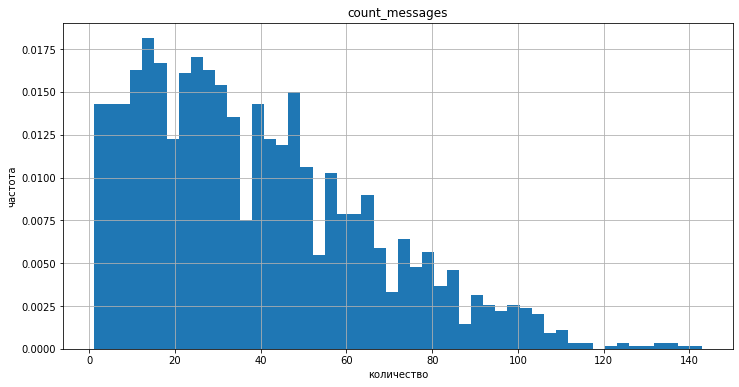

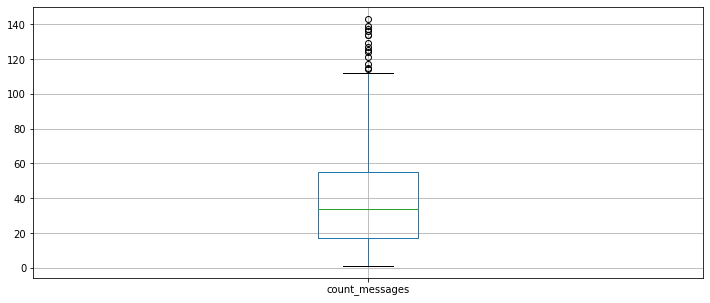

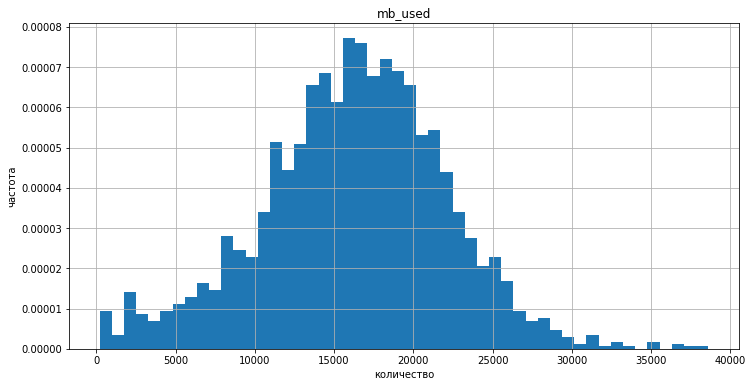

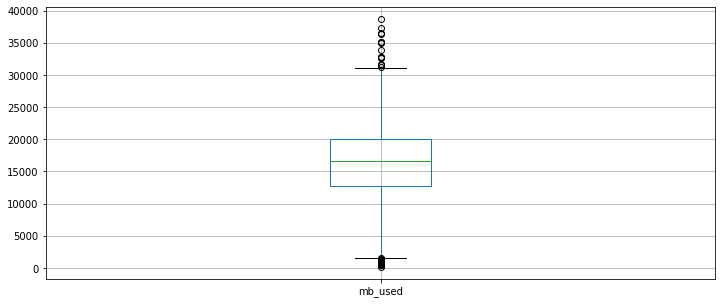

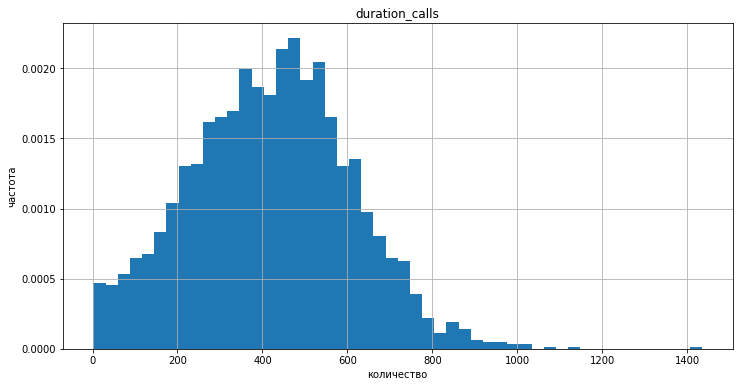

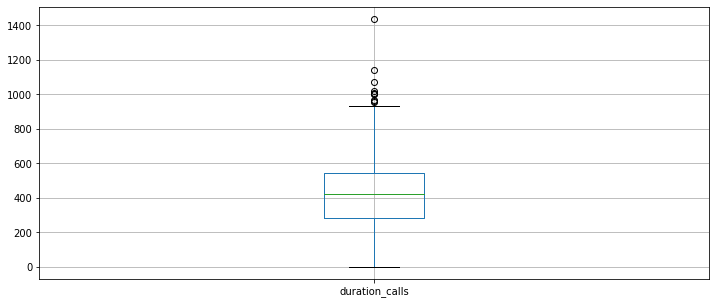

In [101]:
for i in list_expense:
    tmp = user_expense_smart[i]
    (user_expense_smart
         .query('@tmp > 0')
         .hist(i, bins=50, figsize=(12, 6), density=True)
    )
    plt.xlabel('количество')
    plt.ylabel('частота')
    plt.show()
    (user_expense_smart
         .query('@tmp > 0')
         .boxplot(i, figsize=(12, 5))
    )

Теперь ультра:

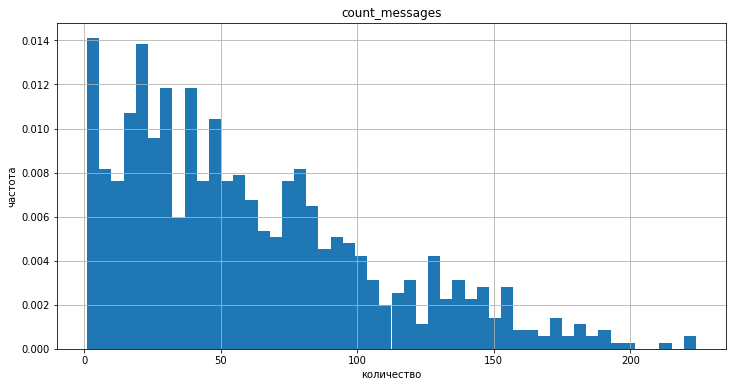

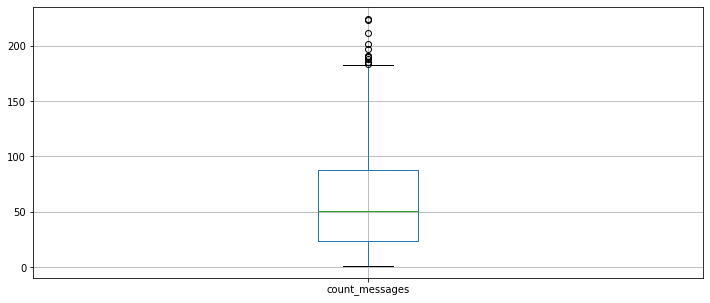

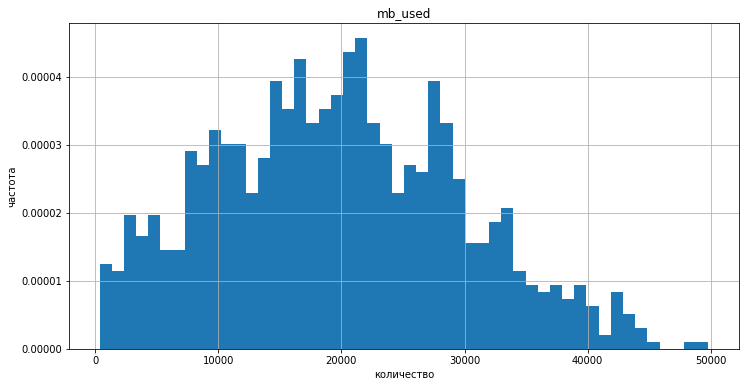

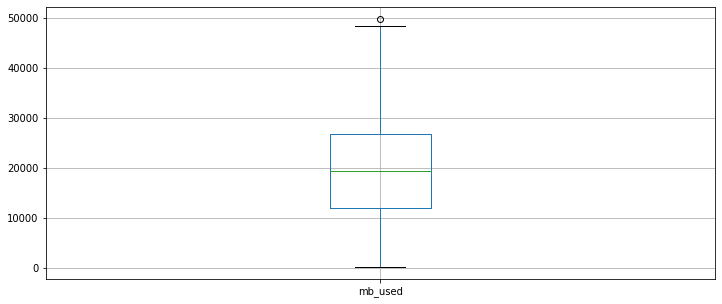

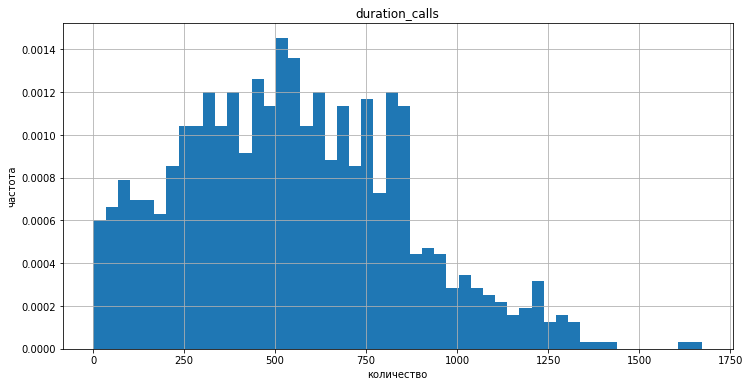

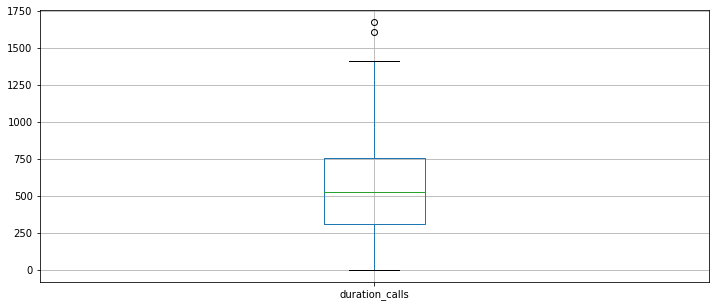

In [102]:
for i in list_expense:
    tmp = user_expense_ultra[i]
    (user_expense_ultra
         .query('@tmp > 0')
         .hist(i, bins=50, figsize=(12, 6), density=True)
    )
    plt.xlabel('количество')
    plt.ylabel('частота')
    plt.show()
    (user_expense_ultra
         .query('@tmp > 0')
         .boxplot(i, figsize=(12, 5))
    )

Откинем выбросы, применив правило трёх сигм:

In [103]:
for i in list_expense:
    tmp = user_expense_smart[i]
    maximum = user_expense_smart[i].mean() + (3 * np.std(user_expense_smart[i]))
    user_expense_smart = user_expense_smart.query('0 < @tmp < @maximum')

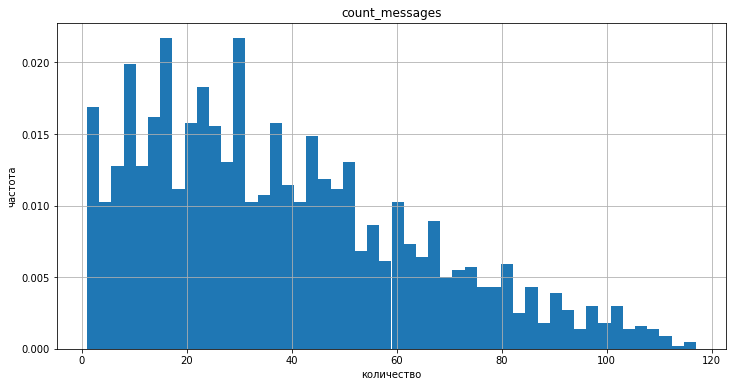

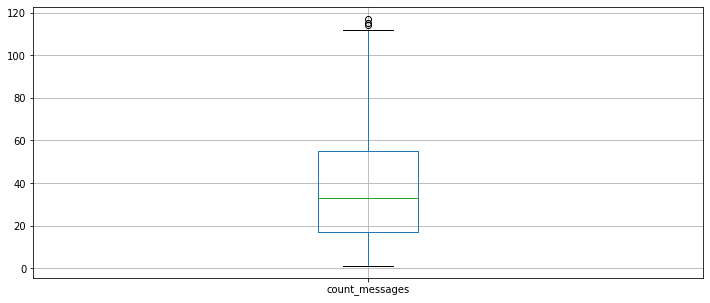

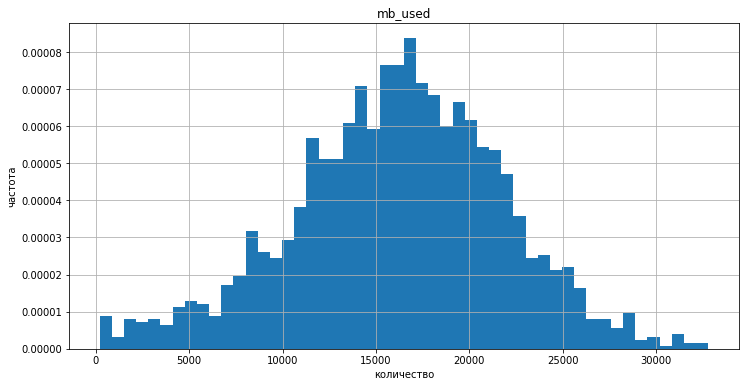

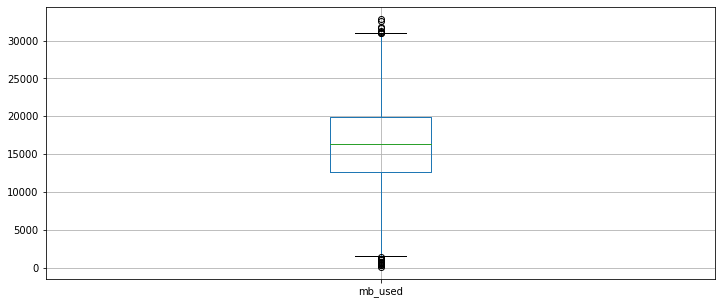

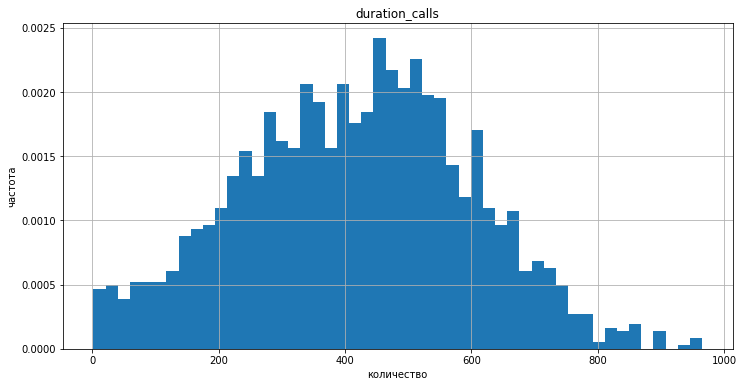

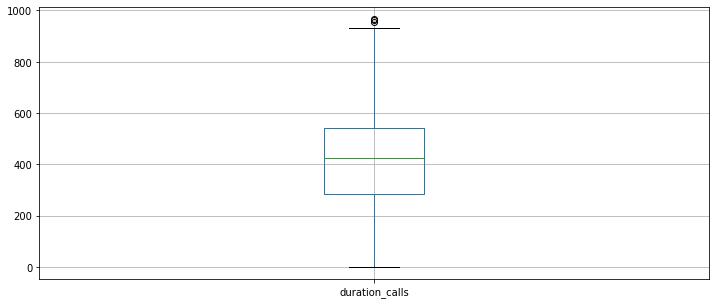

In [104]:
for i in list_expense:
    tmp = user_expense_smart[i]
    (user_expense_smart
         .query('@tmp > 0')
         .hist(i, bins=50, figsize=(12, 6), density=True)
    )
    plt.xlabel('количество')
    plt.ylabel('частота')
    plt.show()
    (user_expense_smart
         .query('@tmp > 0')
         .boxplot(i, figsize=(12, 5))
    )

In [105]:
for i in list_expense:
    tmp = user_expense_ultra[i]
    maximum = user_expense_ultra[i].mean() + (3 * np.std(user_expense_ultra[i]))
    user_expense_ultra = user_expense_ultra.query('0 < @tmp < @maximum')

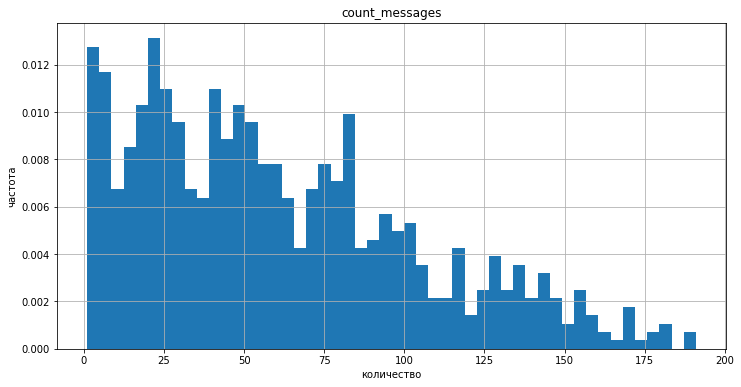

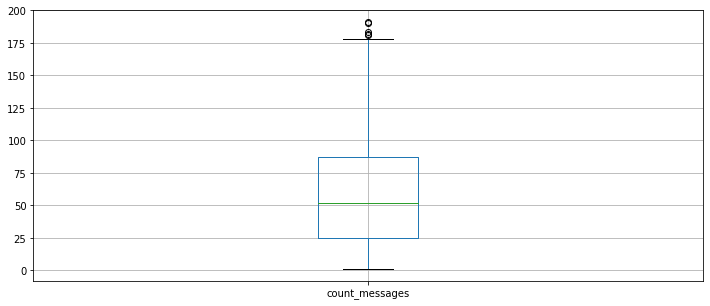

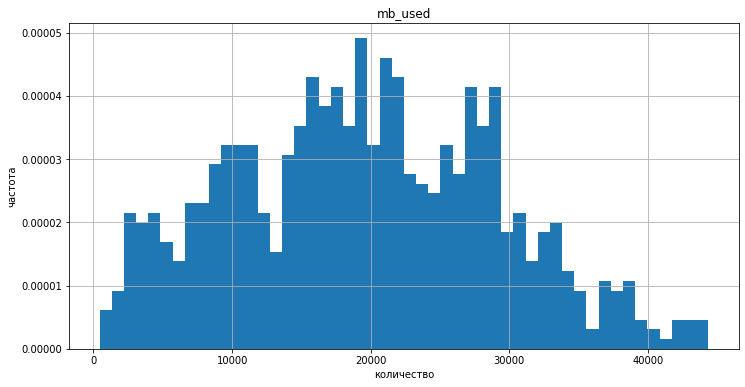

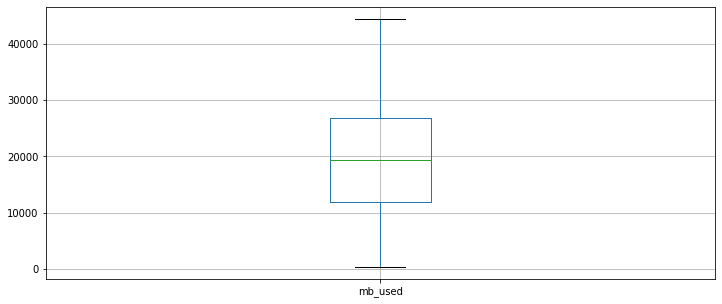

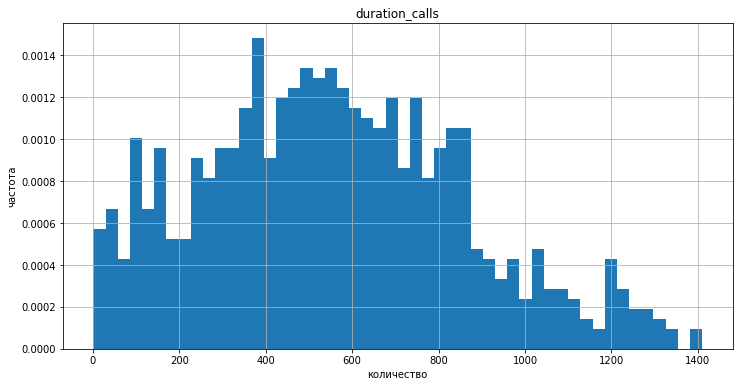

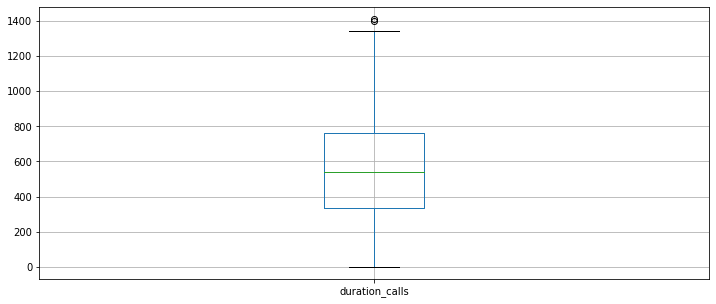

In [106]:
for i in list_expense:
    tmp = user_expense_ultra[i]
    (user_expense_ultra
         .query('@tmp > 0')
         .hist(i, bins=50, figsize=(12, 6), density=True)
    )
    plt.xlabel('количество')
    plt.ylabel('частота')
    plt.show()
    (user_expense_ultra
         .query('@tmp > 0')
         .boxplot(i, figsize=(12, 5))
    )

Выбивающихся значений на боксплотах стало гараздо меньше.  

Посмотрим на попарное расположение гистограмм каждого тарифа по трафикам:

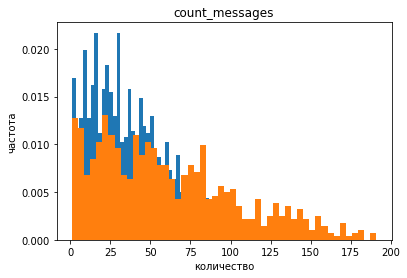

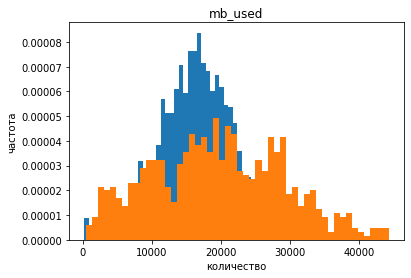

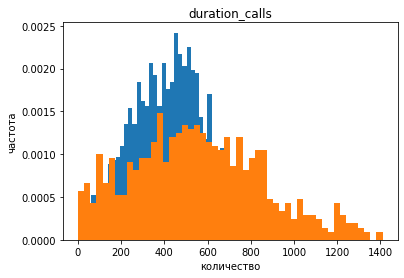

In [107]:
for i in list_expense:
    plt.figure()
    plt.xlabel('количество')
    plt.ylabel('частота')
    plt.hist(user_expense_smart[i], bins=50, density=True)
    plt.hist(user_expense_ultra[i], bins=50, density=True)
    plt.title(i)
    plt.show()

Гистограммы использованных мегобайт и продлжительности звонков имеют вид нормального распределения и скошены вправо, значит медиана у них меньше среднего. Явных двойных пиков не заметно. Гистограмма смс похожа на распределение Пуассона.  

Посмотрим на использование трафиков по месяцам:

In [108]:
user_expense_smart_month = user_expense_smart.groupby('month').agg({'count_messages': ['sum', 'mean'], 'mb_used': ['sum', 'mean'], 'duration_calls': ['sum', 'mean'], 'revenue': ['sum', 'mean']})
user_expense_smart_month

count_messages             mb_used               duration_calls  \
                 sum       mean      sum          mean            sum   
month                                                                   
1                592  19.733333   260433   8681.100000           6531   
2               1397  27.940000   597724  11954.480000          15587   
3               2453  35.550725  1011502  14659.449275          27123   
4               3395  35.736842  1292393  13604.136842          36633   
5               4762  39.032787  1973340  16174.918033          48752   
6               5294  38.086331  2170076  15612.057554          54986   
7               6647  38.421965  2736685  15818.988439          70503   
8               7740  38.700000  3367851  16839.255000          84969   
9               8578  38.814480  3615897  16361.524887          94553   
10              9591  38.518072  4190283  16828.445783         105875   
11             10407  39.124060  4497528  16908.000000         116790   
12             11314  41.291971  4788655  17476.843066         125366   

                  revenue               
             mean     sum         mean  
month                                   
1      217.700000   22125   737.500000  
2      311.740000   41201   824.020000  
3      393.086957   77453  1122.507246  
4      385.610526   92010   968.526316  
5      399.606557  149667  1226.778689  
6      395.582734  163053  1173.043165  
7      407.531792  212282  1227.063584  
8      424.845000  270663  1353.315000  
9      427.841629  277539  1255.832579  
10     425.200803  339173  1362.140562  
11     439.060150  353429  1328.680451  
12     457.540146  390923  1426.726277

In [109]:
user_expense_ultra_month = user_expense_ultra.groupby('month').agg({'count_messages': ['sum', 'mean'], 'mb_used': ['sum', 'mean'], 'duration_calls': ['sum', 'mean'], 'revenue': ['sum', 'mean']})
user_expense_ultra_month

count_messages             mb_used               duration_calls  \
                 sum       mean      sum          mean            sum   
month                                                                   
1                304  43.428571    98018  14002.571429           3332   
2                522  37.285714   208691  14906.500000           5600   
3               1175  48.958333   425566  17731.916667          12213   
4               1727  45.447368   639835  16837.763158          18993   
5               2399  51.042553   909709  19355.510638          25435   
6               3206  50.888889  1165511  18500.174603          31359   
7               4083  60.044118  1372382  20182.088235          38541   
8               4732  57.707317  1585369  19333.768293          43782   
9               5566  62.539326  1724034  19371.168539          50836   
10              6520  68.631579  1918025  20189.736842          53799   
11              6998  66.018868  2069278  19521.490566          59719   
12              7839  71.917431  2406144  22074.715596          69070   

                  revenue               
             mean     sum         mean  
month                                   
1      476.000000   13650  1950.000000  
2      400.000000   27900  1992.857143  
3      508.875000   48450  2018.750000  
4      499.815789   74700  1965.789474  
5      541.170213   94950  2020.212766  
6      497.761905  127350  2021.428571  
7      566.779412  141600  2082.352941  
8      533.926829  166650  2032.317073  
9      571.191011  178650  2007.303371  
10     566.305263  193800  2040.000000  
11     563.386792  218850  2064.622642  
12     633.669725  230400  2113.761468

Построим график с тарифами по месяцам:

In [110]:
for i in list_expense:
    tmp = user_expense[i]
    maximum = user_expense[i].mean() + (3 * np.std(user_expense[i]))
    user_expense_no_null = user_expense.query('0 < @tmp < @maximum')

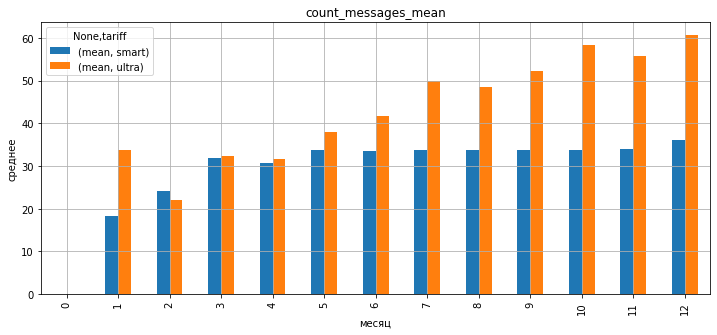

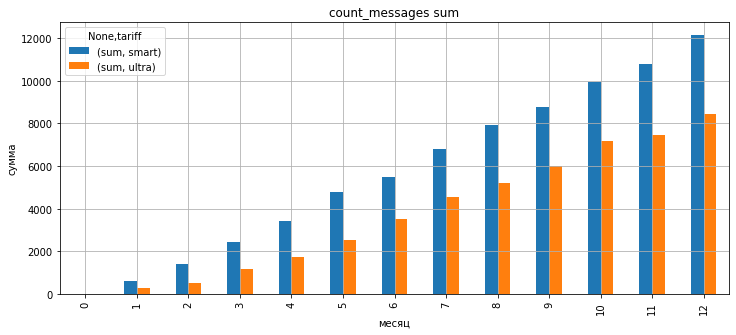

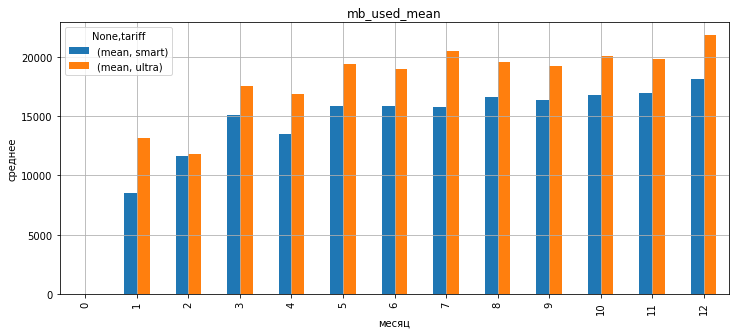

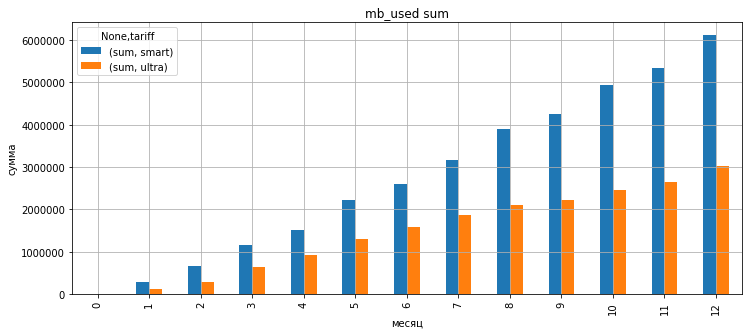

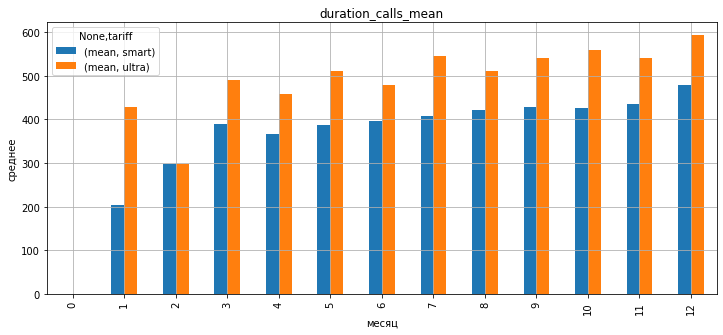

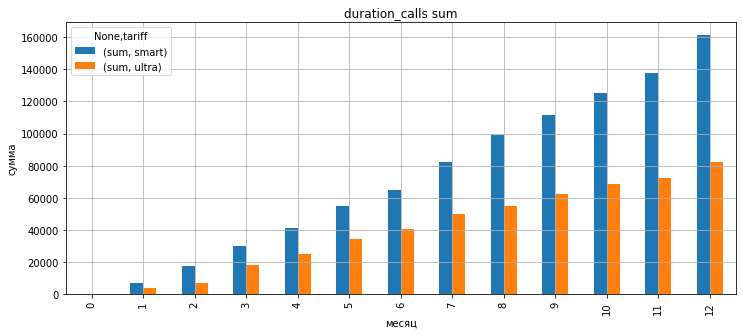

In [111]:

for i in list_expense:
    (user_expense.pivot_table
     (
         index= 'month',
         columns = 'tariff',
         values= i,
         aggfunc=['mean'],
        )
    .plot.bar(grid=True, figsize=(12, 5)))
    name_mean = i + '_mean'
    plt.xlabel('месяц')
    plt.ylabel('среднее')
    plt.title(name_mean)
    (user_expense.pivot_table
     (
         index= 'month',
         columns = 'tariff',
         values= i,
         aggfunc=['sum'],
        )
    .plot.bar(grid=True, figsize=(12, 5)))
    name_sum = i + ' sum'
    plt.xlabel('месяц')
    plt.ylabel('сумма')
    plt.title(name_sum)
    plt.show()

С первого по последний месяц расходы трафиков пользователей растут. Сумма расхода растёт значительно быстрее средних расходов. Это говорит об увеличении количества пользователей тарифов.

## 4 Проверка гипотиз.

Мы берём выборки из одного датасета, параметры у него схожи. Поэтому укажим параметр equal_var=True в методе st.ttest_ind.

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Это нулевая гипотиза. Соответственно альтернативная гипотиза - Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

In [112]:
from scipy import stats as st

In [113]:
alpha = .05
results = st.ttest_ind(
    user_expense.query('tariff == "smart"')['revenue'],
    user_expense.query('tariff == "ultra"')['revenue'],
    equal_var=True
)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 1.7023268870439853e-158
Не получилось отвергнуть нулевую гипотезу


Данное p-value очень мало и говорит о том, что почти с нулевой вероятностью  такое различае можно получить случайно. Можно сделать вывод, что выручка с большей вероятностью различается.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Альтернативная гипотеза - выручка не различается.

In [114]:
alpha = .05
results = st.ttest_ind(
    user_expense.query('city == "Москва"')['revenue'],
    user_expense.query('city != "Москва"')['revenue'],
    equal_var=True
)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 0.5277299573181309
Отвергаем нулевую гипотезу


С вероятностью почти 53% или больше различае можно получить случайно, это слишком большая вероятность, чтобы делать выводы о различае выручки. Можно сделать вывод, что выручка с большей вероятностью не различается.

## 5  Общий вывод. 

Были проанализированы данные по тарифам телеком комании. Исправлены типы данных и заполнены пропуски. Сформированы сводные таблицы для удобства анализа и дальнейших расчётов. Добавлены и посчитаны данные по доходам компании. Проведены исследования и построены графики по распределеню длинны звонков, смс и расходу мегобайт. Определены виды распределений. Наглядно показана разница доходов по месяцам. Проверены гипотизы по отличию доходов компании по тарифам "Смарт" от "Ультра" и региону Москва от других регионов. Выручка между тарифами скорее различается, чем нет. Выручка скорее не зависит от региона, чем зависит.